In [5]:
from Evolution.EvolutionaryLib import BaseChromosome, ChromosomeClassFactory
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
# reinitialisation of base chromosome class, specifying crossover and mutation function 
class MyChromosome(BaseChromosome):
    def __init__(self):
        super().__init__()

    def crossover(self, other):
        new = MyChromosome()
        self.copy(new)

        new['network_architecure'] = self._network_architecure.crossover(other._network_architecure)

        new['lr'] = (self['lr'] + other['lr']) / 2

        return new

    def mutate(self, rate=0.3):
        new = MyChromosome()
        self.copy(new)

        new.lr = new._lr.get() if random.random() < rate else self.lr
        new.network_architecure = new._network_architecure.mutate() if random.random() < rate else self.network_architecure
        
        return new

In [33]:
# fit function, depends only on chromosome 
def evaluate(chromosome: MyChromosome):
    if chromosome.get_score() is not None: 
        return chromosome.get_score()
    
    return sum(chromosome.network_architecure) / ((chromosome.lr - 5) ** 2 + len(chromosome.network_architecure)**0.5)

In [42]:
# object that produces new chromosomes, by specified parameters
chromosome_factory = ChromosomeClassFactory(
        network_architecure={'n': list(range(1, 10)), 'range': list(range(3, 11))},
        lr=(1, 10)
    )

In [43]:
# evolution hyperparameters initialisation 
POPULATION_SIZE = 1200
ITERATIONS = 100
best = None

In [44]:
# need for statistic collection 
statistic_best = []
statistic_mean = []
statistic_genome_size = []
statistic_lr = []
statistic_sum = []

# Evolutionary algorithm 

# initial population initialisation 
population = []
for _ in range(POPULATION_SIZE):
    population.append(chromosome_factory.generate(MyChromosome))

# evolution process 
for _ in tqdm(range(ITERATIONS)):
    # scoring each chromosome 
    scores = [evaluate(chromosome) for chromosome in population]
    for i, chromosome in enumerate(population):
        chromosome.set_score(scores[i])

    # selection of best instances 
    population = sorted(population, key=MyChromosome.get_score, reverse=True)[:POPULATION_SIZE // 3]

    # check for the best solution 
    if best is None or population[0].get_score() > best.get_score():
        best = population[0]
    
    statistic_best.append(best.get_score())
    statistic_mean.append(sum(map(MyChromosome.get_score, population)) / POPULATION_SIZE)
    statistic_sum.append(sum(best.network_architecure))
    statistic_lr.append(best.lr)
    statistic_genome_size.append(len(best.network_architecure))

    
    # filling the population with new genes 
    while len(population) < POPULATION_SIZE:
        r = random.random()
        if r < 0.33:
            population.append(random.choice(population).crossover(random.choice(population)))
        elif 0.33 <= r < 0.66:
            population.append(random.choice(population).mutate())
        else:
            population.append(chromosome_factory.generate(MyChromosome))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.71it/s]


In [45]:
print(best, f'{best.get_score():_}', sep='\n')

--Chromosome--
score: 30.0
network_architecure: (10, 10, 10, 10, 10, 10, 10, 10, 10)
lr: 5.0000000025401805

30.0


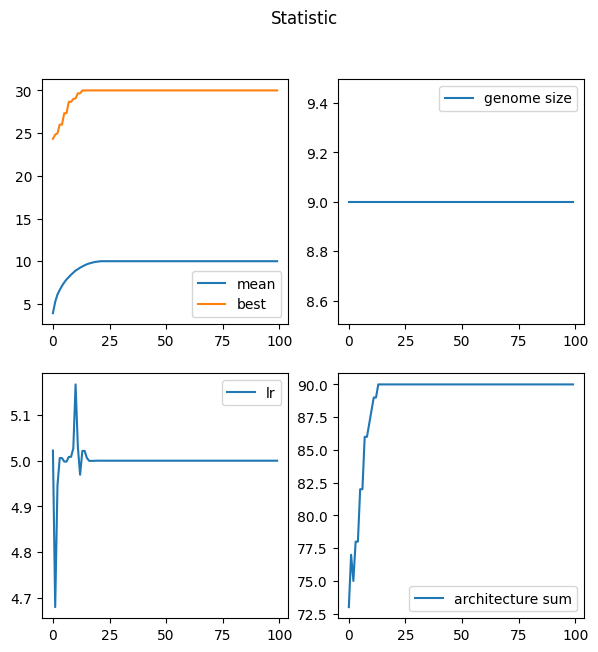

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
fig.suptitle('Statistic')

plt.subplot(2, 2, 1)
plt.plot(statistic_mean, label='mean')
plt.plot(statistic_best, label='best')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(statistic_genome_size, label='genome size')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(statistic_lr, label='lr')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(statistic_sum, label='architecture sum')
plt.legend()

plt.show()